# Histogram

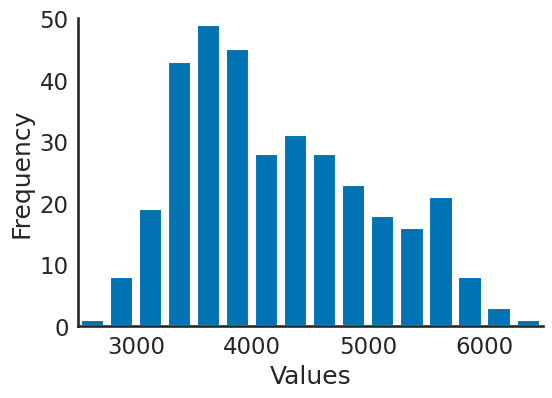

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_style_utils

penguins = sns.load_dataset("penguins")

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

plt.rcParams["ytick.right"] = False
hist_x_data = penguins["body_mass_g"].values

bins = np.arange(2000, 7000, 250)
hist = ax.hist(x=hist_x_data, bins=bins, rwidth=0.8, color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(2500, 6500)
ax.set_ylim(0, 50)
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')

plot_style_utils.save_for_pub(fig=fig, path="figures/histogram", include_vector=False)

# Density plot

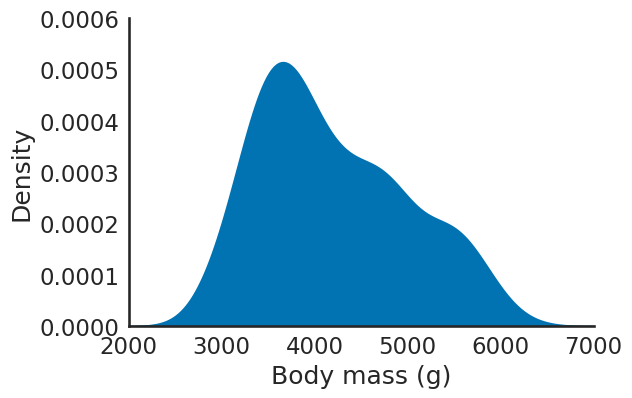

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_style_utils

penguins = sns.load_dataset("penguins")

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

plt.rcParams["ytick.right"] = False

sns.kdeplot(data=penguins, x="body_mass_g", alpha=1, fill=True, ax=ax, color=plot_style_utils.CAT_PALETTE[0])
# sns.rugplot(data=penguins, x="body_mass_g", height=.05, ax=ax, color=plot_style_utils.CAT_PALETTE[1])
ax.set_xlim(2000, 7000)
ax.set_ylim(0, 0.0006)
ax.set_xlabel('Body mass (g)', )
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path="figures/density_snskde", include_vector=False)

# Ridge Plot (dense)

/home/xux/miniconda3/envs/sci-charts-env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/xux/miniconda3/envs/sci-charts-env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/xux/miniconda3/envs/sci-charts-env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


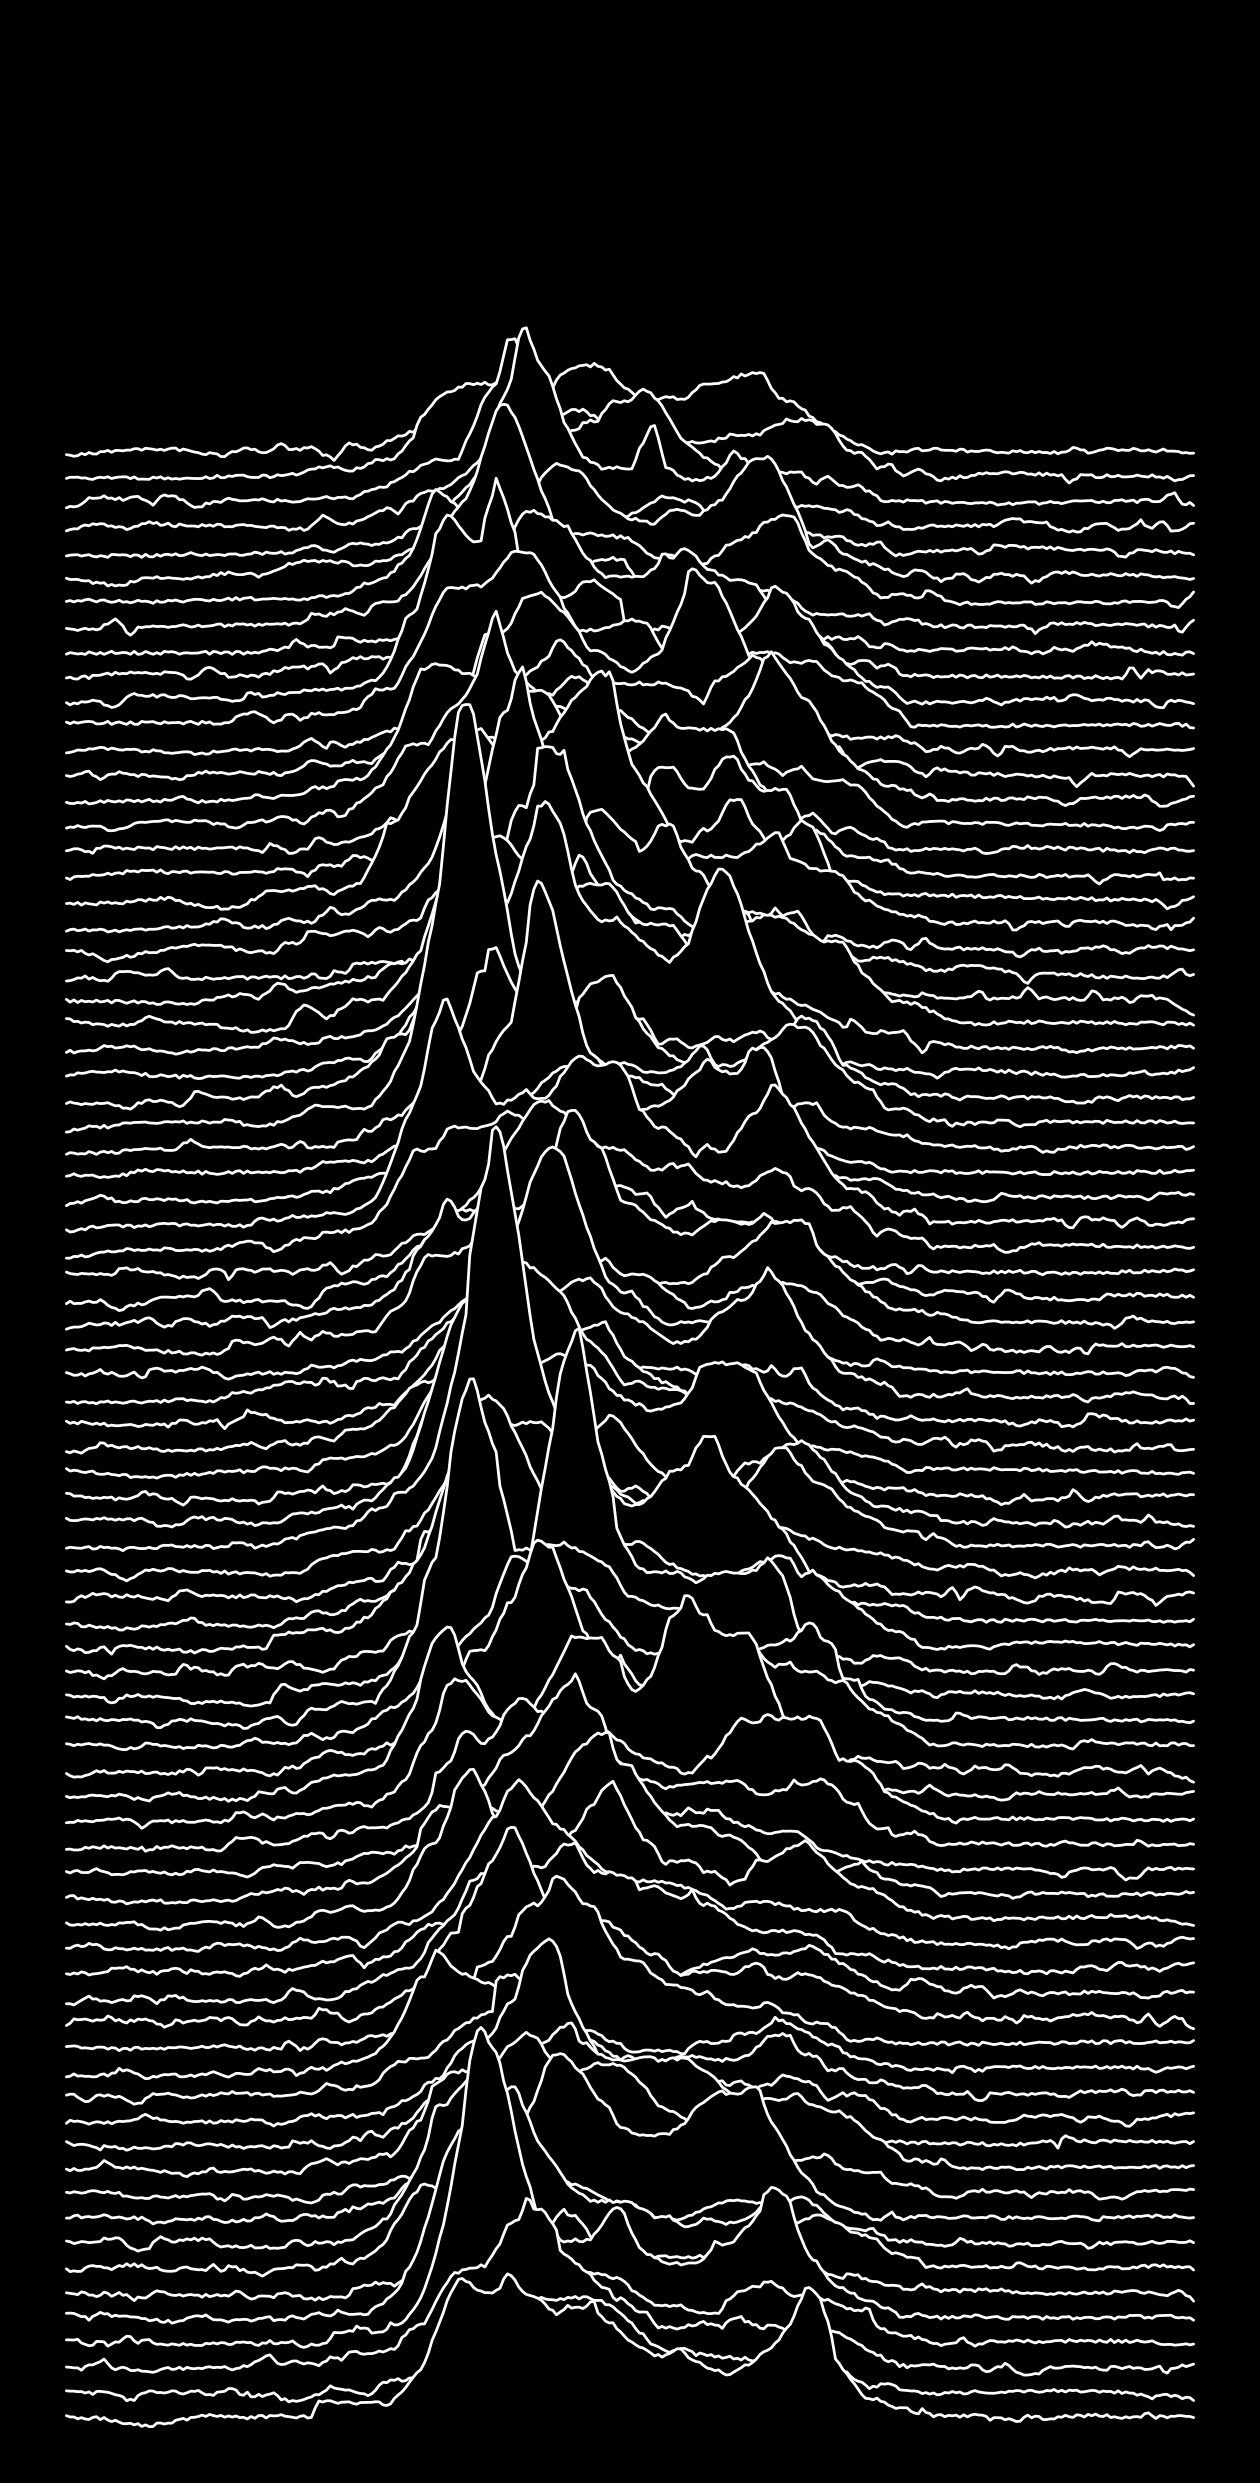

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path = "data/pulsar.csv"

df = pd.read_csv(data_path, header=None)
df = df.stack().reset_index()
df.columns = ['idx', 'x', 'y']

sns.set_theme(rc={"axes.facecolor": (0, 0, 0, 0), 'figure.facecolor':'#000000', 'axes.grid':False})
g = sns.FacetGrid(df, row='idx', aspect=40, height=0.4)

# Draw the densities in a few steps
g.map(sns.lineplot, 'x', 'y', clip_on=False, color='#ffffff', lw=2)
g.map(plt.fill_between, 'x', 'y', color='#000000')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.95)
g.set_titles("")
g.set(yticks=[], xticks=[], ylabel="", xlabel="")
g.despine(bottom=True, left=True)

plt.savefig('figures/ridge_plot.png', facecolor='#000000', dpi=300, bbox_inches='tight')


# Ridge Plot (sparse)

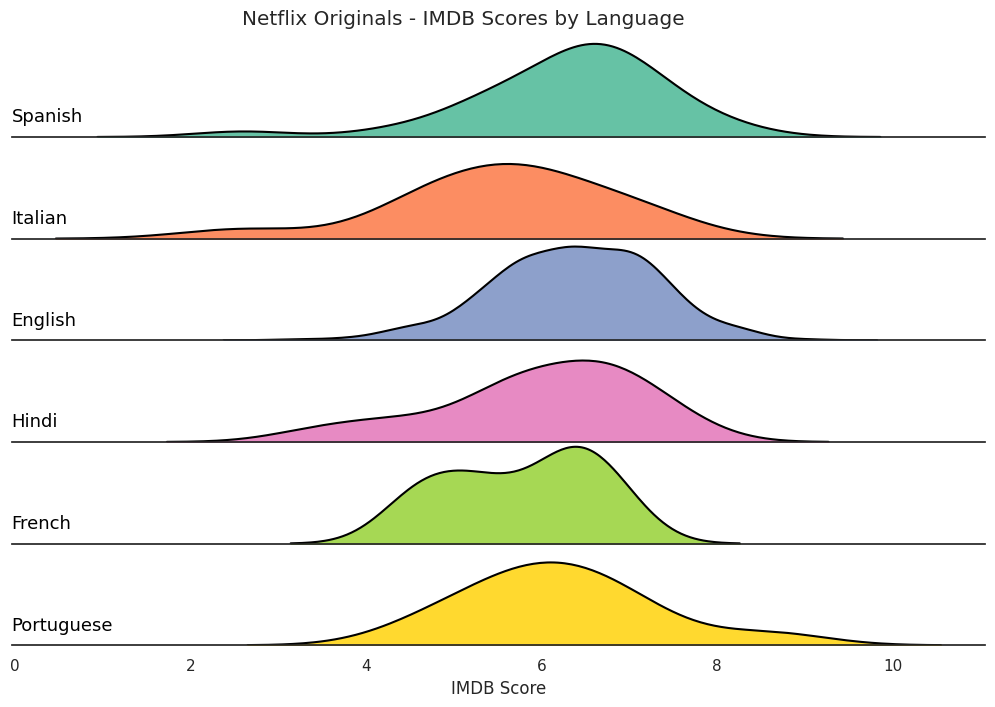

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('data/NetflixOriginals.csv', encoding = "ISO-8859-1")
languages = ['English', 'Hindi', 'Spanish', 'French', 'Italian', 'Portuguese']
df_filtered = df[df['Language'].isin(languages)]

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
palette = sns.color_palette("Set2", 12)

g = sns.FacetGrid(df_filtered, palette=palette, row="Language", hue="Language", aspect=9, height=1.2)  # need to adjust the chart size
g.map_dataframe(sns.kdeplot, x="IMDB Score", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="IMDB Score", color='black')

def add_label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)

g.map(add_label, "Language")

g.fig.subplots_adjust(hspace=0) # need to adjust the space between the charts
g.set_titles("")
g.set(yticks=[], xlabel="IMDB Score", ylabel="") # , 
g.despine(left=True)
plt.suptitle('Netflix Originals - IMDB Scores by Language')#, y=0.98)
plt.savefig('figures/ridge_sparse_plot.png', facecolor='#000000', dpi=300, bbox_inches='tight')

# Multiple density plot

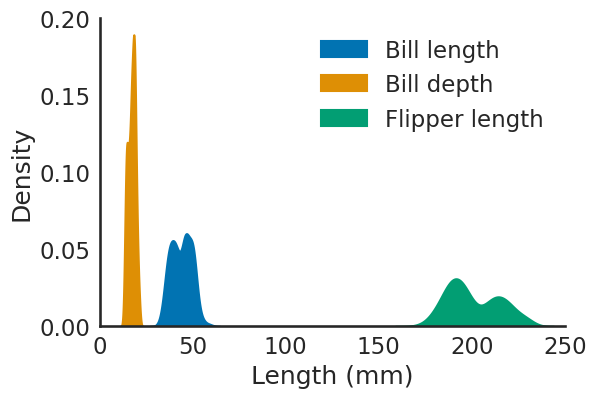

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_style_utils

penguins = sns.load_dataset("penguins")

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

plt.rcParams["ytick.right"] = False

sns.kdeplot(data=penguins, x="bill_length_mm", alpha=1, fill=True, ax=ax, color=plot_style_utils.CAT_PALETTE[0])
sns.kdeplot(data=penguins, x="bill_depth_mm", alpha=1, fill=True, ax=ax, color=plot_style_utils.CAT_PALETTE[1])
sns.kdeplot(data=penguins, x="flipper_length_mm", alpha=1, fill=True, ax=ax, color=plot_style_utils.CAT_PALETTE[2])
ax.set_xlim(0, 250)
ax.set_ylim(0, 0.2)
ax.set_xlabel('Length (mm)', )
ax.set_ylabel('Density')
ax.legend(['Bill length', 'Bill depth', 'Flipper length'], frameon=False)

plot_style_utils.save_for_pub(fig=fig, path="figures/density_multi_snskde", include_vector=False)

In [48]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Q-Q plot 
Theretical quantiles vs sample quantiles plot. To check data distribution

In [56]:
# ! pip install statsmodels

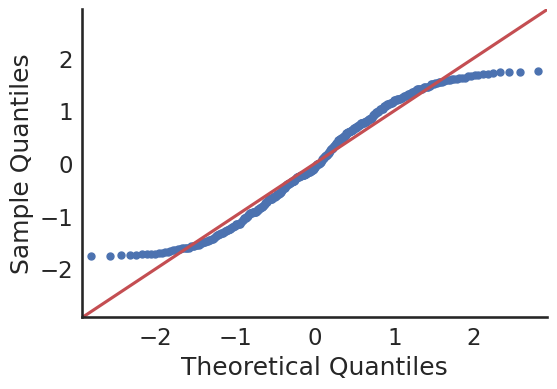

In [13]:
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt
import numpy as np
import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

data = np.random.uniform(0.5, 1.5, 400)

qq_x = sm.ProbPlot(data, fit=True,)
qq_x.qqplot(line='45', marker='o', markersize=5, ax=ax)
plot_style_utils.save_for_pub(fig=fig, path="figures/qq_plot_uniform", include_vector=False)

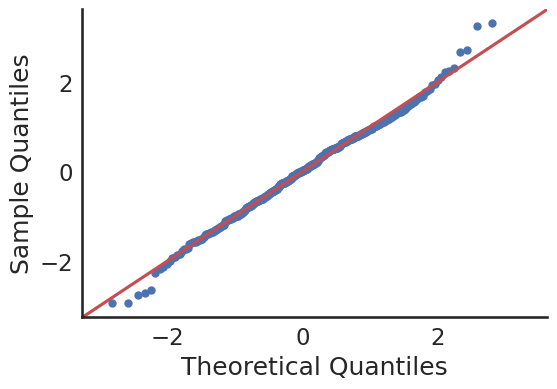

In [14]:
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt
import numpy as np
import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

data = np.random.normal(0, 2, 400)

qq_x = sm.ProbPlot(data, fit=True,)
qq_x.qqplot(line='45', marker='o', markersize=5, ax=ax)
plot_style_utils.save_for_pub(fig=fig, path="figures/qq_plot_normal", include_vector=False)

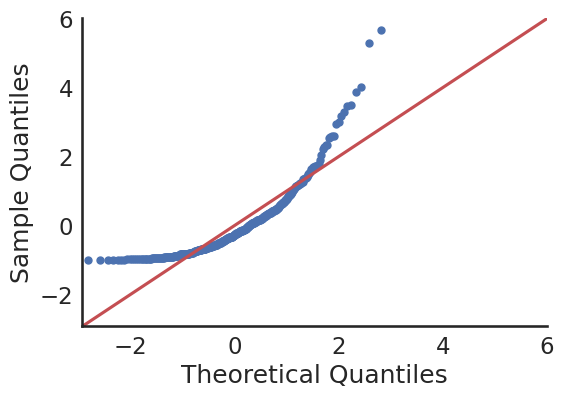

In [15]:
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt
import numpy as np
import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

data = np.random.exponential(1, 400)

qq_x = sm.ProbPlot(data, fit=True,)
qq_x.qqplot(line='45', marker='o', markersize=5, ax=ax)
plot_style_utils.save_for_pub(fig=fig, path="figures/qq_plot_exponential", include_vector=False)

# P-P plot
Theoretical probabilities vs sample probabilities plot. To check data distributions.

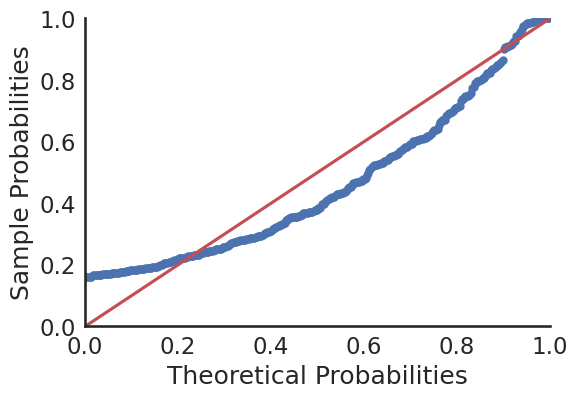

In [16]:
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt
import numpy as np
import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

data = np.random.exponential(1, 400)

pp_x = sm.ProbPlot(data, fit=True,)
pp_x.ppplot(line='45', marker='o', markersize=5, ax=ax)
plot_style_utils.save_for_pub(fig=fig, path="figures/pp_plot_exponential", include_vector=False)

# ECDF plot

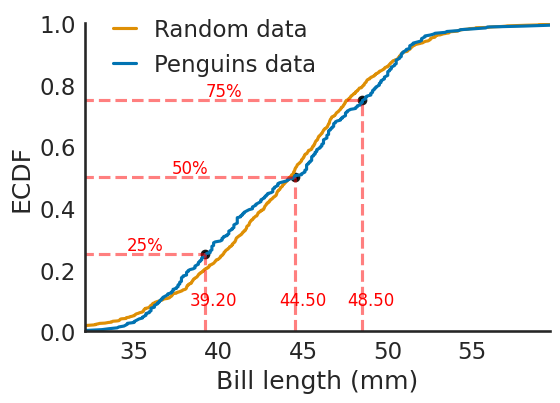

In [71]:
from statsmodels.distributions.empirical_distribution import ECDF
import plot_style_utils
import seaborn as sns
import numpy as np

penguins = sns.load_dataset("penguins")

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

data = np.random.normal(43.92, 5.46, 1000)

ecdf_full = ECDF(data)
ecdf = ECDF(penguins["bill_length_mm"].values)
min, max = penguins["bill_length_mm"].min(), penguins["bill_length_mm"].max()

ax.plot(ecdf_full.x, ecdf_full.y, label="Random data", color=plot_style_utils.CAT_PALETTE[1])
ax.plot(ecdf.x, ecdf.y, label="Penguins data", color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(min, max)
ax.set_ylim(0, 1)
ax.set_xlabel('Bill length (mm)')
ax.set_ylabel('ECDF')
ax.legend(frameon=False, handlelength=1, loc=(0.04, 0.8))

xs, ys = ecdf.x, ecdf.y

percentiles = [25, 50, 75]
for p in percentiles:
    value = xs[np.where(ys > p/100)[0][0] - 1]  # -1 to get the value before the threshold
    pvalue = ys[np.where(ys > p/100)[0][0] - 1]
    ax.scatter(value, pvalue, color='black', s=30, ec='k')
    ax.hlines(y=p/100, xmin=0, xmax=value, color='red', linestyle='--', alpha=0.5)
    ax.vlines(x=value, ymin=0, ymax=p/100, color='red', linestyle='--', alpha=0.5)
    ax.text((value-min)/2 + min, p/100+0.03, f"{p}%", ha='center', va='center', fontsize=12, color='red')
    ax.text(value+0.5, 0.1, f"{value:.2f}", ha='center', va='center', fontsize=12, color='red')

plot_style_utils.save_for_pub(fig=fig, path="figures/ecdf", include_vector=False)
    